In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

1.	In this question, you will implement the Minimum Spanning Tree (MST) approach to cluster the Iris dataset using only the sepal length and sepal width features. Your task is to write a Python program that performs the following steps:

a.	Load the Iris dataset.

In [16]:
iris = load_iris()
data = iris['data']
df = pd.DataFrame(data, columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


b.Extract the sepal length and sepal width columns.


In [17]:
sepal_length = df['sepal length (cm)']
sepal_width = df['sepal width (cm)']
sepal_features = np.column_stack((sepal_length, sepal_width))

c.	Calculate the pairwise Euclidean distances between data points using the selected features.

In [18]:
pairwise_distances = squareform(pdist(sepal_features, metric='euclidean'))

d.	Build the Minimum Spanning Tree using Prim's/Kruskal’s algorithm.

In [19]:
mst = minimum_spanning_tree(pairwise_distances).toarray()

e.Identify the two longest edges in the MST and remove them to create three clusters.


In [20]:
mst_non_zero = mst[np.nonzero(mst)] 
longest_edges = np.sort(mst_non_zero.flatten())[-2:] 

mst[mst == longest_edges[0]] = 0
mst[mst == longest_edges[1]] = 0


f.	Visualize the Minimum Spanning Tree with identified clusters.

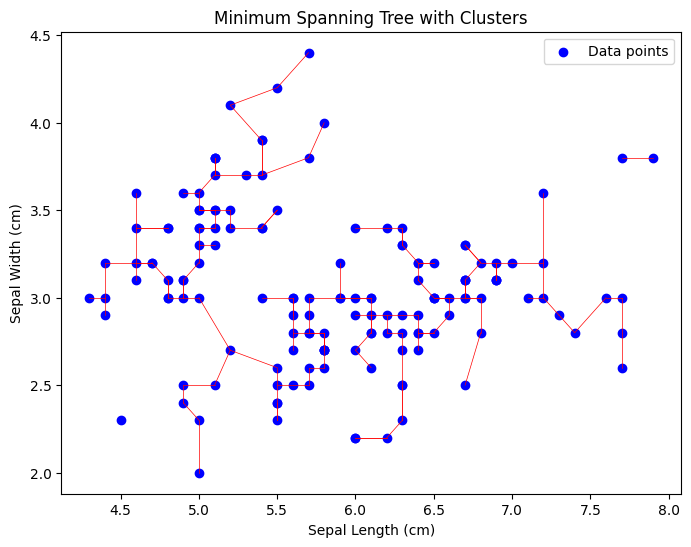

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(sepal_features[:, 0], sepal_features[:, 1], c='blue', label='Data points')

for i in range(len(mst)):
    for j in range(len(mst)):
        if mst[i, j] != 0:
            plt.plot([sepal_features[i, 0], sepal_features[j, 0]],
                     [sepal_features[i, 1], sepal_features[j, 1]],
                     'r-', lw=0.5)

plt.title('Minimum Spanning Tree with Clusters')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()